In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

Epoch 1/10
938/938 [==============================] - 7s 6ms/step - loss: 0.1615 - accuracy: 0.9523 - val_loss: 0.0540 - val_accuracy: 0.9827
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0509 - accuracy: 0.9841 - val_loss: 0.0319 - val_accuracy: 0.9897
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0361 - accuracy: 0.9886 - val_loss: 0.0332 - val_accuracy: 0.9883
Epoch 4/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0274 - accuracy: 0.9912 - val_loss: 0.0265 - val_accuracy: 0.9914
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0207 - accuracy: 0.9935 - val_loss: 0.0357 - val_accuracy: 0.9894
Epoch 6/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0165 - accuracy: 0.9947 - val_loss: 0.0285 - val_accuracy: 0.9912
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0142 - accuracy: 0.9954 - val_loss: 0.0296 - val_accuracy: 0.9901
Epoch 

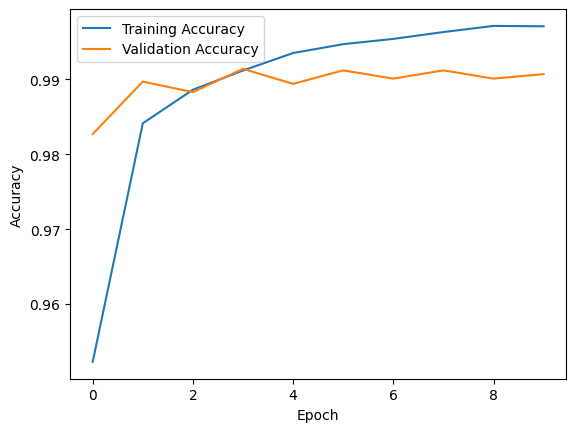

313/313 [==============================] - 1s 3ms/step - loss: 0.0314 - accuracy: 0.9907
Test accuracy: 0.9907000064849854
313/313 [==============================] - 1s 2ms/step


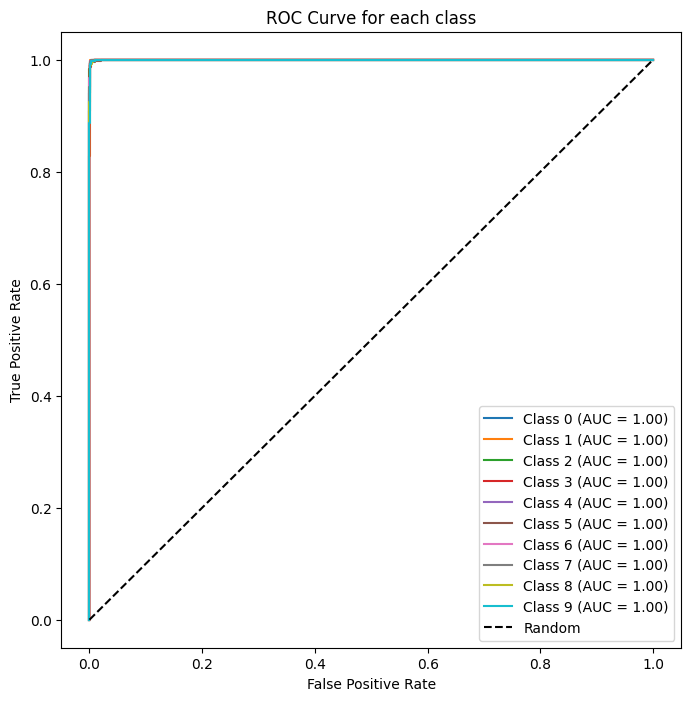

In [ ]:


# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# Define a simple CNN model with attention mechanism
def cnn_with_attention_model():
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output for dense layers
    model.add(layers.Flatten())

    # Intermediate features
    intermediate_features = model.layers[-1].output

    # Attention mechanism
    attention_weights = layers.Dense(1, activation='relu')(intermediate_features)
    attention_weights = layers.Reshape((1, 1, -1))(attention_weights)  # Reshape to match intermediate features
    attended_features = layers.Multiply()([intermediate_features, attention_weights])

    # Dense layers
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model

# Create the model
model = cnn_with_attention_model()

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with monitoring training and validation accuracy
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Predict probabilities for ROC curve
y_prob = model.predict(test_images)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(10):  # Assuming 10 classes
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each class')
plt.legend()
plt.show()
